In [15]:
# import the necessary packages
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
from pyimagesearch.transform import four_point_transform
import dlib
import pytesseract
import cv2
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 


def display_image_in_actual_size(im_data):

    dpi = 80
    depth = 1
    if (len(im_data.shape) == 3):
        height, width,depth = im_data.shape
    else:
        height, width = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [16]:

def rotate_image_to_fit(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 100, 200)

    coords = np.column_stack(np.where(edged > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle


    # rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

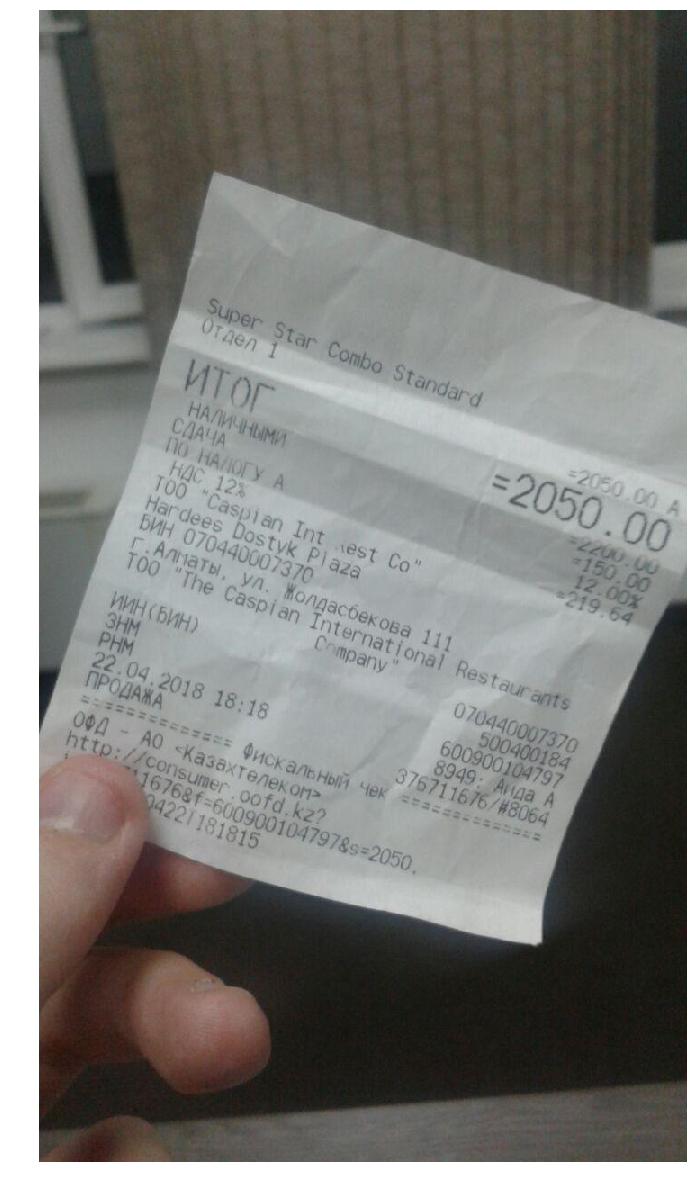

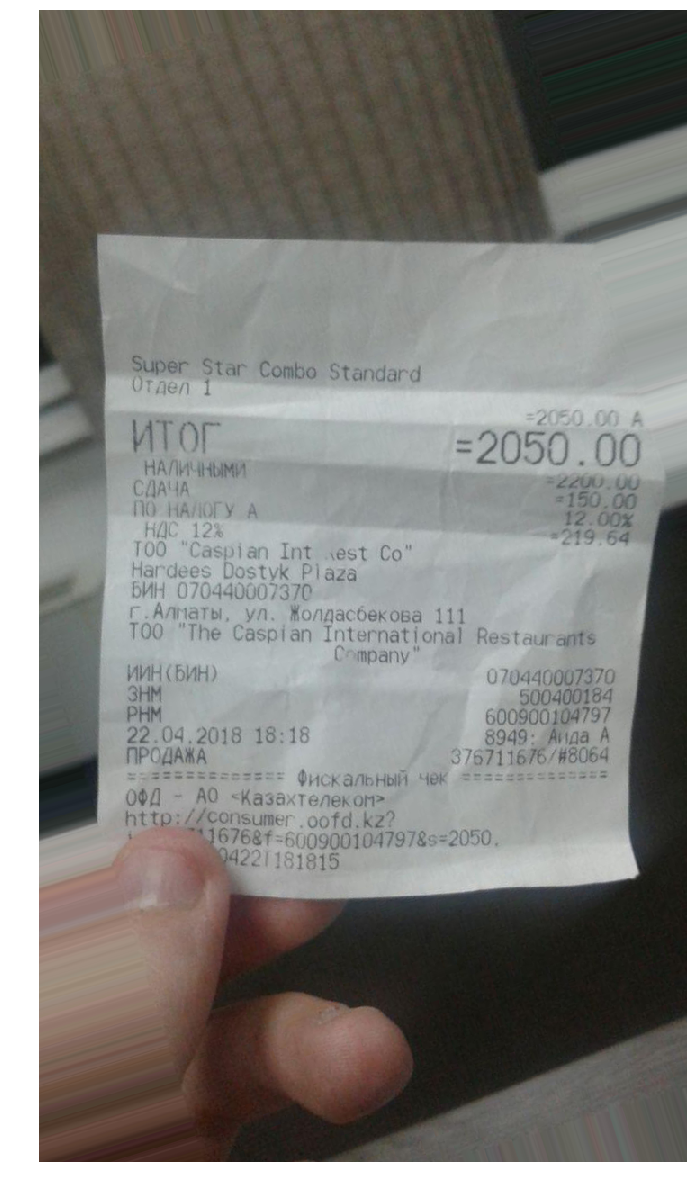

In [17]:
if __name__ == "__main__":
    orig = cv2.imread('img_tests/receipt12.jpg')
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    display_image_in_actual_size(orig)
    display_image_in_actual_size(rotate_image_to_fit(orig))